# Worksheet 06

Name:  Aidan Clark

UID: U01817265

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

In the initialization step, K means randomly selects k points to use as the initial centroids. K means ++ selects initial centroids with probability proportional to their distance from previously selected centers, to avoid having clusters too close or too far apart.

b) What are some limitations of K means ++?

K means ++ tends to form globular clusters of similar sizes and densities, since it's best at clustering datasets with many gaussian shaped humps. So, if one's dataset doesn't fit these specifications, K means ++ is likely to not form the most appropriate clusters for those data.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

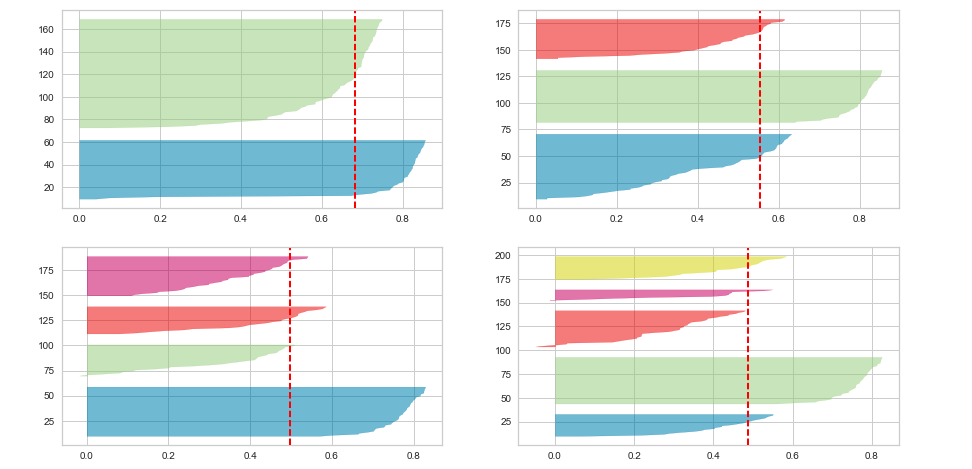

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

Clearly the 2-cluster plot has the highest average silhouette score, and we see that almost all of the points have scores between 0.4 and 0.9. The other three plots have lower average silhouette scores, and have many points with silhouette scores less than 0.5. In particular, we can see that most of the points on the 5-cluster plot are below average and the blue and red clusters in the 3-cluster plot are almost completely below the average. Based on this, I would choose the 2-cluster plot, for its higher average score and the fact that none of the scores are particularly low.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |$2^{1/2}$   |  3 | 1  | $8^{1/2}$  |
| B | $2^{1/2}$   | 0 |  $5^{1/2}$ | 1  |  $2^{1/2}$ |
| C | 3  | $5^{1/2}$  | 0 | $10^{1/2}$  | $5^{1/2}$  |
| D | 1  |  1 | $10^{1/2}$  | 0 |  $5^{1/2}$ |
| E | $8^{1/2}$  | $2^{1/2}$  | $5^{1/2}$  | $5^{1/2}$  | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |$2^{1/2}$   |  3 | 1  | $8^{1/2}$  |
| B | $2^{1/2}$   | 0 |  $5^{1/2}$ | 1  |  $2^{1/2}$ |
| C | 3  | $5^{1/2}$  | 0 | $10^{1/2}$  | $5^{1/2}$  |
| D | 1  |  1 | $10^{1/2}$  | 0 |  $5^{1/2}$ |
| E | $8^{1/2}$  | $2^{1/2}$  | $5^{1/2}$  | $5^{1/2}$  | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

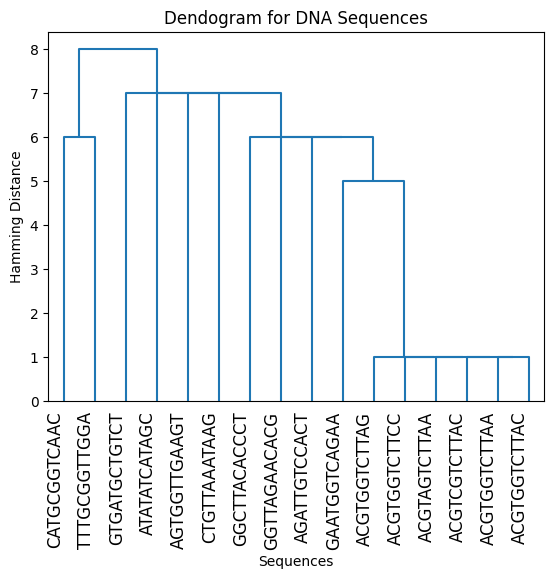

In [50]:
sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

#First, we'll import the appropriate libraries.
import scipy as scipy
import matplotlib.pyplot as plt
import numpy as np

#Reading in dataset
#Scipy provides an agglomerative hierarchical clustering function, but it takes in a 2D m x n array
#where m is the number of observations and n is the number of attributes
#So, I want to split the DNA strings into a 2D array

seq_array = np.array([[letter for letter in sequence] for sequence in sequences])

#Compute Hamming Distance
#Takes in two lists of characters (A, C, G, T) and returns the Hamming Distance between the two sequences
def hamming(x, y):
    if len(x) != len(y):
        raise Exception("the two sequences must be the same length")
    
    distance = 0
    for i in range(0,len(x)):
        if x[i] != y[i]:
            distance += 1

    return distance

#For scipy's hierarchical clustering function, we need a distance matrix
seq_distances = np.empty((len(seq_array), len(seq_array)))
for i in range(0, len(seq_array)):
    for j in range(0,len(seq_array)):
        seq_distances[i][j] = hamming(seq_array[i], seq_array[j])

#Convert to condensed distance vector
condensed_distances = scipy.spatial.distance.squareform(seq_distances)

#Apply Hierarchical clustering using scipy

clusters = scipy.cluster.hierarchy.linkage(condensed_distances, method='single')

#Output dendogram using sequences as labels
plt.figure()
dendrogram = scipy.cluster.hierarchy.dendrogram(clusters, color_threshold = 0, labels = sequences)
plt.title("Dendogram for DNA Sequences")
plt.xlabel("Sequences")
plt.ylabel("Hamming Distance")
plt.xticks(rotation=90, ha='right'); #Rotate labels so that the names don't overlap
